In [1]:
import random
import numpy as np

def sigma(z):
    return 0.5*(np.tanh(0.5*z)+1.)
def sigma_p(z):
    return sigma(z)*(1.-sigma(z))

class neurons(object):
    def __init__(self, shape):
        self.shape = shape
        self.v = [np.zeros((n,1)) for n in shape]
        self.z = [np.zeros((n,1)) for n in shape[1:]]
        self.w = [np.random.randn(n,m) for n,m in zip(shape[1:],shape[:-1])]
        self.b = [np.random.randn(n,1) for n in shape[1:]]
        self.delw = [np.zeros(w.shape) for w in self.w]
        self.delb = [np.zeros(b.shape) for b in self.b]

    def predict(self, x):
        self.v[0] = x.reshape(self.v[0].shape)
        for l in range(len(self.shape)-1):
            self.z[l] = np.dot(self.w[l],self.v[l])+self.b[l]
            self.v[l+1] = sigma(self.z[l])
        return self.v[-1]

    def gradient(self, y):
        for l in range(len(self.shape)-2,-1,-1):
            if l==len(self.shape)-2:
                  delta = (self.v[-1]-y.reshape(self.v[-1].shape))*sigma_p(self.z[l])
            else: delta = np.dot(self.w[l+1].T,self.delb[l+1])*sigma_p(self.z[l])
            self.delb[l] = delta
            self.delw[l] = np.dot(delta,self.v[l].T)

    def fit(self, x_data, y_data, epochs, batch_size, eta):
        samples = list(zip(x_data, y_data))
        for ep in range(epochs):
            print('Epoch: %d/%d' % (ep+1,epochs))
            random.shuffle(samples)
            sum_delw = [np.zeros(w.shape) for w in self.w]
            sum_delb = [np.zeros(b.shape) for b in self.b]
            batch_count = 0
            for x,y in samples:
                self.predict(x)
                self.gradient(y)
                for l in range(len(self.shape)-1):
                    sum_delw[l] += self.delw[l]
                    sum_delb[l] += self.delb[l]
                batch_count += 1
                if batch_count>=batch_size or (x is samples[-1][0]):
                    for l in range(len(self.shape)-1):
                        self.w[l] -= eta/batch_count*sum_delw[l]
                        self.b[l] -= eta/batch_count*sum_delb[l]
                        sum_delw[l],sum_delb[l] = 0.,0.
                    batch_count = 0
            ret = self.evaluate(x_data, y_data)
            print('Loss: %.4f, Acc: %.4f' % ret)

    def evaluate(self, x_data, y_data):
        loss, cnt = 0., 0.
        for x,y in zip(x_data, y_data):
            self.predict(x)
            loss += ((self.v[-1]-y.reshape(self.v[-1].shape))**2).sum()
            if np.argmax(self.v[-1])==np.argmax(y): cnt += 1.
        loss /= 2.*len(x_data)
        return loss, cnt/len(x_data)


In [9]:
L=[]
for l in range(10-2,-1,-1):
    L.append(l)

In [10]:
L

[8, 7, 6, 5, 4, 3, 2, 1, 0]

Epoch: 1/20
Loss: 0.0968, Acc: 0.9098
Epoch: 2/20
Loss: 0.0649, Acc: 0.9304
Epoch: 3/20
Loss: 0.0531, Acc: 0.9454
Epoch: 4/20
Loss: 0.0398, Acc: 0.9600
Epoch: 5/20
Loss: 0.0337, Acc: 0.9613
Epoch: 6/20
Loss: 0.0251, Acc: 0.9826
Epoch: 7/20
Loss: 0.0193, Acc: 0.9833
Epoch: 8/20
Loss: 0.0161, Acc: 0.9862
Epoch: 9/20
Loss: 0.0142, Acc: 0.9906
Epoch: 10/20
Loss: 0.0123, Acc: 0.9906
Epoch: 11/20
Loss: 0.0133, Acc: 0.9919
Epoch: 12/20
Loss: 0.0105, Acc: 0.9919
Epoch: 13/20
Loss: 0.0097, Acc: 0.9919
Epoch: 14/20
Loss: 0.0093, Acc: 0.9927
Epoch: 15/20
Loss: 0.0087, Acc: 0.9919
Epoch: 16/20
Loss: 0.0084, Acc: 0.9922
Epoch: 17/20
Loss: 0.0081, Acc: 0.9921
Epoch: 18/20
Loss: 0.0079, Acc: 0.9927
Epoch: 19/20
Loss: 0.0077, Acc: 0.9925
Epoch: 20/20
Loss: 0.0076, Acc: 0.9927
Performance (training)
Loss: 0.00758, Acc: 0.99274
Performance (testing)
Loss: 0.00542, Acc: 0.99574


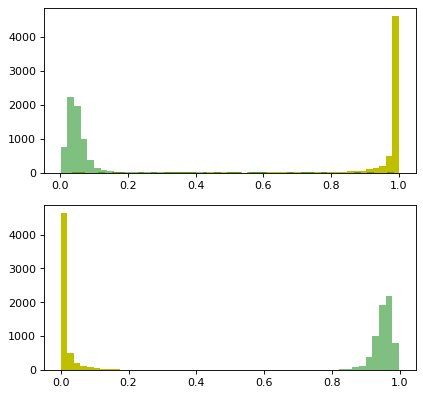

In [12]:
import numpy as np
import matplotlib.pyplot as plt

mnist = np.load('mnist.npz')
x_train = mnist['x_train'][mnist['y_train']<=1]/255.
y_train = mnist['y_train'][mnist['y_train']<=1]
x_test = mnist['x_test'][mnist['y_test']<=1]/255.
y_test = mnist['y_test'][mnist['y_test']<=1]

x_train = np.array([[img.mean(),img[10:18,11:17].mean()] for img in x_train])
y_train = np.array([[[1,0],[0,1]][n] for n in y_train])
x_test = np.array([[img.mean(),img[10:18,11:17].mean()] for img in x_test])
y_test = np.array([[[1,0],[0,1]][n] for n in y_test])

# from neurons import neurons
model = neurons([2,5,2])
model.fit(x_train, y_train, 20, 30, 1.0)

print('Performance (training)')
print('Loss: %.5f, Acc: %.5f' % model.evaluate(x_train, y_train))
print('Performance (testing)')
print('Loss: %.5f, Acc: %.5f' % model.evaluate(x_test, y_test))

out = np.array([model.predict(x) for x in x_train])

fig = plt.figure(figsize=(6,6), dpi=80)
plt.subplot(2,1,1)
plt.hist(out[:,0][y_train[:,0]==1], bins=50, color='y')
plt.hist(out[:,0][y_train[:,1]==1], bins=50, color='g', alpha=0.5)
plt.subplot(2,1,2)
plt.hist(out[:,1][y_train[:,0]==1], bins=50, color='y')
plt.hist(out[:,1][y_train[:,1]==1], bins=50, color='g', alpha=0.5)
plt.show()


Epoch: 1/20
Loss: 0.4120, Acc: 0.3396
Epoch: 2/20
Loss: 0.3607, Acc: 0.4348
Epoch: 3/20
Loss: 0.3261, Acc: 0.4869
Epoch: 4/20
Loss: 0.3026, Acc: 0.5268
Epoch: 5/20
Loss: 0.2853, Acc: 0.5595
Epoch: 6/20
Loss: 0.2720, Acc: 0.5821
Epoch: 7/20
Loss: 0.2619, Acc: 0.5957
Epoch: 8/20
Loss: 0.2543, Acc: 0.6046
Epoch: 9/20
Loss: 0.2483, Acc: 0.6119
Epoch: 10/20
Loss: 0.2431, Acc: 0.6183
Epoch: 11/20
Loss: 0.2382, Acc: 0.6278
Epoch: 12/20
Loss: 0.2318, Acc: 0.6514
Epoch: 13/20
Loss: 0.2237, Acc: 0.6751
Epoch: 14/20
Loss: 0.2165, Acc: 0.6861
Epoch: 15/20
Loss: 0.2107, Acc: 0.6935
Epoch: 16/20
Loss: 0.2057, Acc: 0.6996
Epoch: 17/20
Loss: 0.2000, Acc: 0.7071
Epoch: 18/20
Loss: 0.1863, Acc: 0.7422
Epoch: 19/20
Loss: 0.1744, Acc: 0.7603
Epoch: 20/20
Loss: 0.1670, Acc: 0.7700
Performance (training)
Loss: 0.16698, Acc: 0.77002
Performance (testing)
Loss: 0.16494, Acc: 0.77170


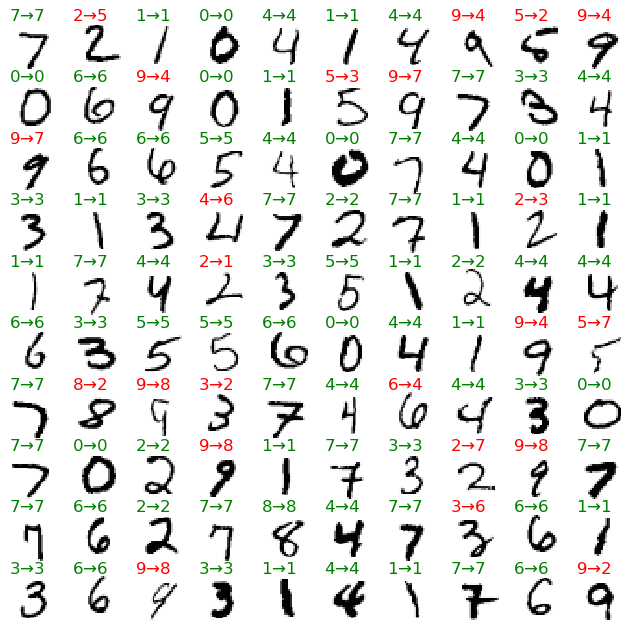

In [17]:
import numpy as np
import matplotlib.pyplot as plt

mnist = np.load('mnist.npz')
x_train = mnist['x_train']/255.
y_train = np.array([np.eye(10)[n] for n in mnist['y_train']])
x_test = mnist['x_test']/255.
y_test = np.array([np.eye(10)[n] for n in mnist['y_test']])

# from neurons import neurons
model = neurons([784,30,10])
model.fit(x_train, y_train, 20, 1000, 3.0)#1000換10會好很多

print('Performance (training)')
print('Loss: %.5f, Acc: %.5f' % model.evaluate(x_train, y_train))
print('Performance (testing)')
print('Loss: %.5f, Acc: %.5f' % model.evaluate(x_test, y_test))

p_test = np.array([model.predict(x) for x in x_test])

fig = plt.figure(figsize=(10,10), dpi=80)
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    plt.imshow(mnist['x_test'][i], cmap='Greys')
    c='Green'
    if y_test[i].argmax()!=p_test[i].argmax(): c='Red'
    plt.text(0.,0.,'$%d\\to%d$' % (y_test[i].argmax(),p_test[i].argmax()),color=c,fontsize=15)
plt.show()


In [16]:
np.eye(10)[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy

mnist = np.load('mnist.npz')
x_train = mnist['x_train'][:10000]/255.
y_train = np.array([np.eye(10)[n] for n in mnist['y_train'][:10000]])

scores = np.zeros((2,50))

# from neurons import neurons
m1 = neurons([784,30,10])
m2 = copy.deepcopy(m1)
for w in m2.w:
    w /= (w.shape[1])**0.5

for ep in range(50):
    m1.fit(x_train, y_train, 1, 10, 3.0)
    m2.fit(x_train, y_train, 1, 10, 3.0)
    scores[0][ep],acc = m1.evaluate(x_train, y_train)
    scores[1][ep],acc = m2.evaluate(x_train, y_train)

vep = np.linspace(1.,50.,50)
fig = plt.figure(figsize=(6,6), dpi=80)
plt.plot(vep,scores[0], lw=3)
plt.plot(vep,scores[1], lw=3)
plt.show()

In [127]:
import random
x_data= np.random.randn(4) 
y_data=np.random.randn(4) 
W=1.0

In [128]:
x_data

array([ 0.4461927 ,  1.84419719, -2.33294531,  0.05151678])

In [129]:
y_data

array([ 0.00382941, -0.33329888,  0.79263023,  0.01616323])

In [143]:
import numpy as np

def sigma(z):
    return 1. / (1 + np.exp(-z))
def sigma_p(z):
    return sigma(z)*(1.-sigma(z))

class neurons(object):
    def __init__(self, shape):
        self.shape = shape
        self.v = [np.zeros((n,1)) for n in shape]
        self.z = [np.zeros((n,1)) for n in shape[1:]]
        self.w = [np.random.randn(n,m) for n,m in zip(shape[1:],shape[:-1])]
        self.b = [np.random.randn(n,1) for n in shape[1:]]
        self.delw = [np.zeros(w.shape) for w in self.w]
        self.delb = [np.zeros(b.shape) for b in self.b]

    def predict(self, x):
        self.v[0] = x.reshape(self.v[0].shape)
        for l in range(len(self.shape)-1):
            self.z[l] = np.dot(self.w[l],self.v[l])+self.b[l]
            self.v[l+1] = sigma(self.z[l])
        return self.v[-1]

    def gradient(self, y):
        for l in range(len(self.shape)-2,-1,-1):
            if l==len(self.shape)-2:
                  delta = (self.v[-1]-y.reshape(self.v[-1].shape))*sigma_p(self.z[l])
            else: delta = np.dot(self.w[l+1].T,self.delb[l+1])*sigma_p(self.z[l])
            self.delb[l] = delta
            self.delw[l] = np.dot(delta,self.v[l].T)

def calc_NN_gradients(x_data, y_data, W):
    grad = np.zeros(10)
    ### START YOUR CODE HERE ###
    model = neurons([4,10,4])
    x=np.zeros(94)
    x[0:80] = np.array([W]*80)
    x[80:84] = np.array([1]*4)

    model.w[0] = x[:40].reshape(model.w[0].shape)
    model.w[1] = x[40:80].reshape(model.w[1].shape)
    model.b[1] = x[80:84].reshape(model.b[1].shape)
    
    bias=np.linspace(0.0,0.9,10)
    x[84:94]=np.array([i for i in bias ])
    model.b[0] = x[84:94].reshape(model.b[0].shape)
    model.predict(x_data)
    model.gradient(y_data)
    grad=model.delb[0].reshape(grad.shape)

    
    
#     for i,j in enumerate(bias):
        
        
#         x[84:94] = np.array([j]*10)
#         model.b[0] = x[84:94].reshape(model.b[0].shape)

#         model.predict(x_data)
#         model.gradient(y_data)
        
#         grad[i]=model.delb[0][0]
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
#         y = np.array([model.predict(x) for x in x_data])        
#         loss[i]=((y[:,:,0]-y_data)**2).sum()/len(x_data)**2/ 2.
    
    
    
    
    
#     model.fit(x_train, y_train, 20, 30, 1.0)
#     out = np.array([model.predict(x) for x in x_train])
    
    

    #### END YOUR CODE HERE ####
    return grad#,model.delb#,model.delb[0]


In [144]:
calc_NN_gradients(x_data, y_data, W)

array([0.00071996, 0.00071784, 0.00071217, 0.00070306, 0.00069069,
       0.00067529, 0.00065714, 0.00063657, 0.00061393, 0.00058957])

In [134]:
np.array([5]*4)

array([5, 5, 5, 5])

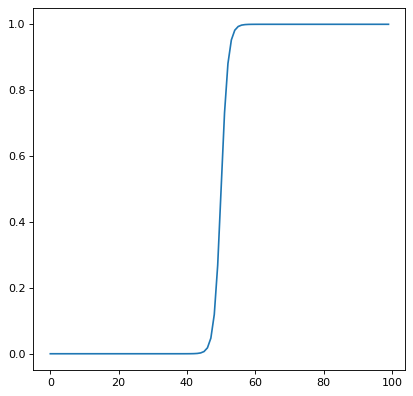

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits.axisartist as axisartist
 
def sigmoid(x):
    return 1. / (1 + np.exp(-x))
 

c=np.zeros(100)
for j in range(0,100):
    c[j] = sigma(j-50)

fig = plt.figure(figsize=(6,6), dpi=80)
plt.plot(c)


In [152]:
bias=np.linspace(0.0,0.9,10)
np.array([i for i in bias ])

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [174]:
import random
x_data= [np.random.randn(4) for i in range(20) ]
y_data= [np.random.randn(4) for i in range(20) ]
W=1.0

In [175]:
x_data

[array([-0.41930529, -0.20723735, -0.7913716 , -1.32166725]),
 array([-0.8349473 , -0.12792275,  2.69956483, -1.09115078]),
 array([0.24522629, 1.25255505, 0.47550703, 1.4655717 ]),
 array([-0.30417127, -2.30389383,  0.2831138 ,  0.11322052]),
 array([ 1.70008771, -1.53343238,  1.14066566,  0.02281591]),
 array([-0.87642501, -0.05420517,  1.9295178 , -0.73344948]),
 array([-0.82814466, -0.94595968,  1.82557739,  2.02868294]),
 array([-0.51546468,  0.10804651, -1.94973806,  0.51566022]),
 array([ 1.5462083 ,  2.13220225,  1.3540507 , -1.25343436]),
 array([-2.06148496,  0.17868926, -0.73901371, -0.53221115]),
 array([-1.08308929, -2.80534638, -0.52210402,  0.20753667]),
 array([-0.34261244,  0.56614379, -1.94614051,  0.58829935]),
 array([ 0.21572968, -0.67351414, -1.61340547,  0.17326752]),
 array([ 1.01476859, -0.34098344, -0.5296065 , -0.76429338]),
 array([0.88280646, 1.2631296 , 0.59627304, 1.12159449]),
 array([ 0.99825865, -0.31679124,  1.63878296,  0.28107436]),
 array([ 0.59686

In [176]:
y_data

[array([-0.11299839,  0.00735764,  0.91882413,  0.24642942]),
 array([-1.34334233,  0.38190394, -0.59196507, -0.30557677]),
 array([-1.64816291, -1.71283468,  0.10735253,  1.22841747]),
 array([0.437047  , 0.41414713, 0.23693831, 0.00097551]),
 array([-0.22396393, -0.19976878, -0.87309619, -0.29531046]),
 array([-0.80271286,  0.32053421,  1.3027635 ,  0.49222873]),
 array([ 0.35253055, -0.77645495, -0.61201587, -0.20710787]),
 array([-2.10734885, -1.09628994,  0.12179415, -0.41651757]),
 array([ 0.56171131,  1.64116182,  0.71539307, -0.70110826]),
 array([ 0.17878504, -2.2072177 ,  0.60905669,  0.37027886]),
 array([ 0.53042713, -0.14885644,  0.37569929,  1.05495571]),
 array([ 0.87290432,  0.17655701,  0.25274213, -0.53445548]),
 array([ 0.7424946 ,  1.18945089, -0.1433542 ,  0.06700696]),
 array([-0.71622517,  0.01031662,  0.48698122,  0.82111626]),
 array([0.35060169, 1.32359267, 1.9976205 , 0.5108008 ]),
 array([0.48751312, 0.65972093, 0.19601897, 0.10174397]),
 array([ 0.50760998,

In [191]:
import random
import numpy as np

def sigma(z):
    return 1. / (1 + np.exp(-z))
def sigma_p(z):
    return sigma(z)*(1.-sigma(z))

class neurons(object):
    def __init__(self, shape):
        self.shape = shape
        self.v = [np.zeros((n,1)) for n in shape]
        self.z = [np.zeros((n,1)) for n in shape[1:]]
        self.w = [np.random.randn(n,m) for n,m in zip(shape[1:],shape[:-1])]
        self.b = [np.random.randn(n,1) for n in shape[1:]]
        self.delw = [np.zeros(w.shape) for w in self.w]
        self.delb = [np.zeros(b.shape) for b in self.b]

    def predict(self, x):
        self.v[0] = x.reshape(self.v[0].shape)
        for l in range(len(self.shape)-1):
            self.z[l] = np.dot(self.w[l],self.v[l])+self.b[l]
            self.v[l+1] = sigma(self.z[l])
        return self.v[-1]

    def gradient(self, y):
        for l in range(len(self.shape)-2,-1,-1):
            if l==len(self.shape)-2:
                  delta = (self.v[-1]-y.reshape(self.v[-1].shape))*sigma_p(self.z[l])
            else: delta = np.dot(self.w[l+1].T,self.delb[l+1])*sigma_p(self.z[l])
            self.delb[l] = delta
            self.delw[l] = np.dot(delta,self.v[l].T)
    def fit(self, x_data, y_data, epochs, batch_size, eta):
        samples = list(zip(x_data, y_data))
        for ep in range(epochs):
            print('Epoch: %d/%d' % (ep+1,epochs))
            random.shuffle(samples)
            sum_delw = [np.zeros(w.shape) for w in self.w]
            sum_delb = [np.zeros(b.shape) for b in self.b]
            batch_count = 0
            for x,y in samples:
                self.predict(x)
                self.gradient(y)
                for l in range(len(self.shape)-1):
                    sum_delw[l] += self.delw[l]
                    sum_delb[l] += self.delb[l]
                batch_count += 1
                if batch_count>=batch_size or (x is samples[-1][0]):
                    for l in range(len(self.shape)-1):
                        self.w[l] -= eta/batch_count*sum_delw[l]
                        self.b[l] -= eta/batch_count*sum_delb[l]
                        sum_delw[l],sum_delb[l] = 0.,0.
                    batch_count = 0
#             ret = self.evaluate(x_data, y_data)
#             print('Loss: %.4f, Acc: %.4f' % ret)
#     def evaluate(self, x_data, y_data):
#         loss, cnt = 0., 0.
#         for x,y in zip(x_data, y_data):
#             self.predict(x)
#             loss += ((self.v[-1]-y.reshape(self.v[-1].shape))**2).sum()
#             if np.argmax(self.v[-1])==np.argmax(y): cnt += 1.
#         loss /= 2.*len(x_data)
#         return loss, cnt/len(x_data)

 
def train_NN_gradient_descent(x_train, y_train, W):
    bias = np.zeros(10)
    ### START YOUR CODE HERE ###
    model = neurons([4,10,4])
    x=np.zeros(94)
    x[0:80] = np.array([W]*80)
    x[80:84] = np.array([1]*4)

    model.w[0] = x[:40].reshape(model.w[0].shape)
    model.w[1] = x[40:80].reshape(model.w[1].shape)
    model.b[1] = x[80:84].reshape(model.b[1].shape)
    
    bias=np.linspace(0.0,0.9,10)
    x[84:94]=np.array([i for i in bias ])
    model.b[0] = x[84:94].reshape(model.b[0].shape)
    ###initial完###
    model.fit(x_train, y_train, 10, 20, 0.2)
#     model.predict(x_data)
#     model.gradient(y_data)
    bias=model.b[0].reshape(bias.shape)

    #### END YOUR CODE HERE ####
    return bias

In [192]:
train_NN_gradient_descent(x_data, y_data, W)

Epoch: 1/10
Epoch: 2/10
Epoch: 3/10
Epoch: 4/10
Epoch: 5/10
Epoch: 6/10
Epoch: 7/10
Epoch: 8/10
Epoch: 9/10
Epoch: 10/10


array([-0.01399302,  0.08493271,  0.18380523,  0.28262629,  0.38139833,
        0.48012455,  0.5788089 ,  0.67745614,  0.77607177,  0.87466206])

In [145]:
#HW1

In [169]:
import numpy as np

def sigma(z):
    return 1. / (1 + np.exp(-z))
def sigma_p(z):
    return sigma(z)*(1.-sigma(z))

class neurons(object):
    def __init__(self, shape):
        self.shape = shape
        self.v = [np.zeros((n,1)) for n in shape]
        self.z = [np.zeros((n,1)) for n in shape[1:]]
        self.w = [np.random.randn(n,m) for n,m in zip(shape[1:],shape[:-1])]
        self.b = [np.random.randn(n,1) for n in shape[1:]]
        self.delw = [np.zeros(w.shape) for w in self.w]
        self.delb = [np.zeros(b.shape) for b in self.b]

    def predict(self, x):
        self.v[0] = x.reshape(self.v[0].shape)
        for l in range(len(self.shape)-1):
            self.z[l] = np.dot(self.w[l],self.v[l])+self.b[l]
            self.v[l+1] = sigma(self.z[l])
        return self.v[-1]

    def gradient(self, y):
        for l in range(len(self.shape)-2,-1,-1):
            if l==len(self.shape)-2:
                  delta = (self.v[-1]-y.reshape(self.v[-1].shape))*sigma_p(self.z[l])
            else: delta = np.dot(self.w[l+1].T,self.delb[l+1])*sigma_p(self.z[l])
            self.delb[l] = delta
            self.delw[l] = np.dot(delta,self.v[l].T)

def calc_NN_gradients(x_data, y_data, W):
    grad = np.zeros(10)
    ### START YOUR CODE HERE ###
    model = neurons([4,10,4])
    x=np.zeros(94)
    x[0:80] = np.array([W]*80)
    x[80:84] = np.array([1]*4)

    model.w[0] = x[:40].reshape(model.w[0].shape)
    model.w[1] = x[40:80].reshape(model.w[1].shape)
    model.b[1] = x[80:84].reshape(model.b[1].shape)
    
    bias=np.linspace(0.0,0.9,10)
    x[84:94]=np.array([i for i in bias ])
    model.b[0] = x[84:94].reshape(model.b[0].shape)
    model.predict(x_data)
    model.gradient(y_data)
    grad=model.delb[0].reshape(grad.shape)

    #### END YOUR CODE HERE ####
    return grad
